# IFT3395/6390: Devoir 1

Mahmoud Abou-Nassif C2840

Jean Archambault

---

## 1 Petit exercice de probabilités

On modélise le problème de la façon suivante:

$$ X_1 \in \{P, N\} \quad et \quad X_2 \in \{C, B\}$$

Où  


$P$ : Test positif  
$N$ : Test negatif  
$C$ : Cancer  
$B$ : Benin  

D'après l'énoncé, on a déja les egalités suivantes:

- $ P(X_2=C)=0.01 $  
- $ P(X_1=P| X_2=C)=0.8 $
- $ P(X_1=P| X_2=B)=0.096 $  

La question consiste à trouver la probabilité suivante: 

$$ P(X_2=C|X_1=P)$$

On peut déduire la probabilité de l'absence d'un cancer du sein chez les femmes dans la quarantaine participant à un test de routine:    

$$ P(X_2=B) = 1 - P(X_2=C) = 0.99 $$

D'après la règle de Bayes on a:

$$ 
\begin{align}
P(X_2=C|X_1=P) & = \frac{P(X_1=P|X_2=C)P(X_2=C)}{P(X_1=P)} \\   
& = \frac{P(X_1=P|X_2=C)P(X_2=C)}{P(X_1=P|X_2=C)P(X_2=C) + P(X_1=P|X_2=B)P(X_2=B)}\approx 7.76\% 
\end{align} 
$$


On déduit que la réponse des médecins est incorrecte. La probabilité est moins de 10% donc réponse $F)$

## 3 Partie pratique: estimation de densité


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

**Partie 1:** Estimateur de densité paramétrique Gaussien diagonal `gauss_mv`

In [2]:
class gauss:
    
    def __init__(self,n_dims):
        self.n_dims = n_dims
        
    def train(self, train_data):
        self.mu = np.mean(train_data, axis=0)
        self.sigma_sq = np.sum((train_data - self.mu) ** 2.0, axis = 0) / train_data.shape[0] 
    
    def compute_predictions(self, test_data):
        c = -self.n_dims * np.log(2*np.pi)/2.0 - np.log(np.prod(self.sigma_sq))/2.0
        return c - np.sum((test_data -  self.mu)**2.0/ (2.0 * self.sigma_sq),axis=1)

**Partie 2:** Un estimateur de densité Parzen à noyau isotropique `parzen`

In [3]:
class parzen:
    
    def __init__(self, n_dims, sigma=1):
        self.sigma = sigma
        self.n_dims = n_dims
        
        self.c = 1/(((2*np.pi)**(self.n_dims/2))*(sigma**self.n_dims))
    
    def train(self, train_data):
        self.train_data = train_data
    
    def compute_predictions(self, test_data):
        log_probs = np.ones(test_data.shape[0])
    
        for (i,ex) in enumerate(test_data):
            log_probs[i] = np.log(np.sum(self.c*np.exp((-0.5*np.sum((self.train_data - ex)**2, axis=0))/(self.sigma**2)))/self.train_data.shape[0])
        
        return log_probs

**Partie 3:** Densités 1D

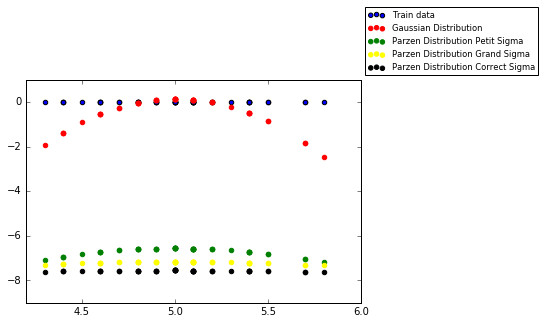

In [11]:
iris = np.loadtxt('iris.txt')
train_cols = [0]

iris_train1=iris[0:50,train_cols]

gauss_model = gauss(1)
petit_parzen_model = parzen(1, 5)
grand_parzen_model = parzen(1, 10)
correct_parzen_model = parzen(1, 15)

gauss_model.train(iris_train1)
petit_parzen_model.train(iris_train1)
grand_parzen_model.train(iris_train1)
correct_parzen_model.train(iris_train1)

gauss_log_preds = gauss_model.compute_predictions(iris_train1)
petit_parzen_log_preds = petit_parzen_model.compute_predictions(iris_train1)
grand_parzen_log_preds = grand_parzen_model.compute_predictions(iris_train1)
correct_parzen_log_preds = correct_parzen_model.compute_predictions(iris_train1)

fontP = FontProperties()
fontP.set_size('small')

plt.scatter(iris_train1, np.zeros(iris_train1.shape[0]), label='Train data')

plt.scatter(iris_train1, gauss_log_preds, color='red', label='Gaussian Distribution')
plt.scatter(iris_train1, petit_parzen_log_preds, color='green', label='Parzen Distribution Petit Sigma')
plt.scatter(iris_train1, grand_parzen_log_preds, color='yellow', label='Parzen Distribution Grand Sigma')
plt.scatter(iris_train1, correct_parzen_log_preds, color='black', label='Parzen Distribution Correct Sigma')

plt.legend(loc='lower left', bbox_to_anchor=(1,1), prop = fontP)

plt.show()

**Partie 4:** Densités 2D

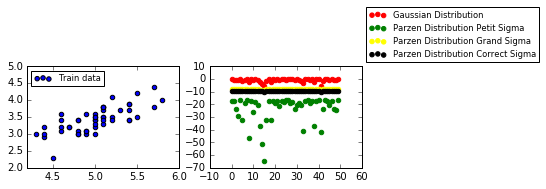

In [32]:
iris = np.loadtxt('iris.txt')
train_cols = [0,1]

iris_train1=iris[0:50,train_cols]

gauss_model = gauss(2)
petit_parzen_model = parzen(2, 0.5)
grand_parzen_model = parzen(2, 3)
correct_parzen_model = parzen(2, 10)

gauss_model.train(iris_train1)
petit_parzen_model.train(iris_train1)
grand_parzen_model.train(iris_train1)
correct_parzen_model.train(iris_train1)

gauss_log_preds = gauss_model.compute_predictions(iris_train1)
petit_parzen_log_preds = petit_parzen_model.compute_predictions(iris_train1)
grand_parzen_log_preds = grand_parzen_model.compute_predictions(iris_train1)
correct_parzen_log_preds = correct_parzen_model.compute_predictions(iris_train1)

fontP = FontProperties()
fontP.set_size('small')

plt.subplot(221)
plt.scatter(iris_train1[:,0], iris_train1[:,1], label='Train data')
plt.legend(loc='upper left', prop= fontP)

plt.subplot(222)
plt.scatter(list(range(iris_train1.shape[0])), gauss_log_preds, color='red', label='Gaussian Distribution')
plt.scatter(list(range(iris_train1.shape[0])), petit_parzen_log_preds, color='green', label='Parzen Distribution Petit Sigma')
plt.scatter(list(range(iris_train1.shape[0])), grand_parzen_log_preds, color='yellow', label='Parzen Distribution Grand Sigma')
plt.scatter(list(range(iris_train1.shape[0])), correct_parzen_log_preds, color='black', label='Parzen Distribution Correct Sigma')

plt.legend(loc='lower left', bbox_to_anchor=(1,1), prop = fontP)

plt.show()

## 4 Partie pratique: estimation de densité

**Partie 1:** numpy.random

In [6]:
np.random.seed(123)

idx = list(range(0,iris.shape[0]))
np.random.shuffle(idx)

milieu = int(iris.shape[0]/2)
iris_train = iris[idx[:milieu]]
iris_valid = iris[idx[milieu:]]